In [1]:
from src.util import load_video
from pathlib import Path
import numpy as np

# show the mode image
import matplotlib.pyplot as plt
def show_image(image, title="Image"):
    plt.imshow(image.numpy()[:, :, ::-1])
    plt.title(title)
    plt.axis("off")
    plt.show()

video = load_video(Path("data/public/videos/2_i_kitchen_bridge_mp.mp4"))


video

[array([[[109,  91,  81],
         [109,  91,  81],
         [109,  91,  81],
         ..., 
         [ 99,  78,  57],
         [ 99,  78,  57],
         [ 98,  77,  56]],
 
        [[109,  91,  81],
         [109,  91,  81],
         [109,  91,  81],
         ..., 
         [100,  79,  58],
         [100,  79,  58],
         [100,  79,  58]],
 
        [[111,  93,  83],
         [111,  93,  83],
         [111,  93,  83],
         ..., 
         [100,  79,  58],
         [100,  79,  58],
         [100,  79,  58]],
 
        ..., 
        [[ 78,  91,  94],
         [ 76,  89,  92],
         [ 75,  85,  89],
         ..., 
         [ 95,  81,  54],
         [100,  86,  59],
         [ 98,  84,  57]],
 
        [[ 83, 101, 103],
         [ 77,  95,  97],
         [ 75,  90,  93],
         ..., 
         [100,  86,  59],
         [ 99,  85,  58],
         [ 93,  79,  52]],
 
        [[ 81,  99, 101],
         [ 76,  94,  96],
         [ 79,  94,  97],
         ..., 
         [ 93,  79,  52

In [2]:
import gc
video_np = np.array(video)

In [ ]:
del video
gc.collect()

0

In [5]:
from src.video_dataset import mode_image
mode_img = mode_image(video_np)


In [ ]:
# # get the mode image
# def get_mode_image(video_tensor):
#     # Compute the mode across the first dimension (time)
#     mode_img, _ = torch.mode(video_tensor, dim=0)
#     return mode_img
# mode_image = get_mode_image(video_t)	
# print("Mode image shape:", mode_image.shape)

Mode image shape: torch.Size([720, 1280, 3])


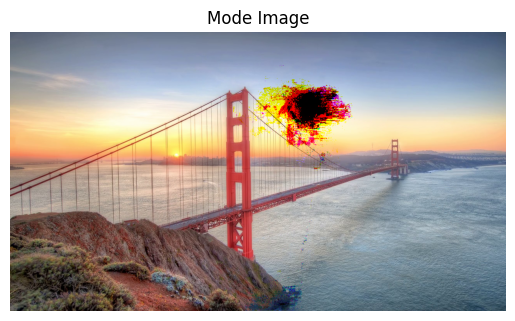

In [ ]:
show_image(mode_img, title="Mode Image")

In [8]:
from src.leak_model import BackgroundLeakSegmenter
import cv2


# Load model including filter flags
model = BackgroundLeakSegmenter.load_from_checkpoint(
    "lightning_logs/version_21/checkpoints/best-epoch=1-val_loss=0.153.ckpt",
    use_edge=True,
    use_dog=True,
    use_mode=True,
    mode_dir="data_dummy/public/modes",
)

In [10]:
from src.video_dataset import mode_image

In [ ]:
mode_img = mode_image()

In [9]:
reconstructed_bg = model.reconstruct_from_numpy_frames(video_np, verbose=False)
show_image(reconstructed_bg, title="Reconstructed Background")


TypeError: expected TensorOptions(dtype=float, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)) (got TensorOptions(dtype=unsigned char, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)))